# City Salary Data Analyis
One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

# Exploration Ideas

* How have salaries changed over time between different groups of people?
* How are base pay, overtime pay, and benefits allocated between   different groups?
* Is there any evidence of pay discrimination based on gender in this dataset?
* How is budget allocated based on different groups and responsibilities?

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
data = pd.read_csv('../data/Salaries.csv', low_memory=False)
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Basic data study

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
data.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


### What are your observations about the basic statistics of data?

## What columns do you think do not add value to our analysis? Drop those columns.

In [5]:
data.shape

(148654, 13)

In [6]:
data.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109724
OvertimePay          66162
OtherPay             84243
Benefits             98647
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

In [7]:
data['Status'].value_counts(dropna=False)

NaN    110535
FT      22334
PT      15785
Name: Status, dtype: int64

**Insights:**
 - `Id`, `Notes`, `Agency` have empty or unique values for each row
 - `Status` might provide good insight, but it has 74% of the values missing so analysis would be very biased.

In [8]:
data['EmployeeName'].value_counts()

Kevin Lee           13
Richard Lee         11
Steven Lee          11
William Wong        11
John Chan            9
                    ..
Ciro Garcia          1
Alejandro G Ben      1
ELIZABETH CHAVEZ     1
Joven Aquino         1
Steven J Maes        1
Name: EmployeeName, Length: 110811, dtype: int64

In [9]:
data[data['EmployeeName'] == 'Kevin Lee']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
39715,39716,Kevin Lee,Police Officer 3,115866.9,23523.3,9313.54,34906.2,148703.74,183609.94,2012,NaN,San Francisco,NaN
40570,40571,Kevin Lee,Police Officer 3,117171.41,19606.88,4244.9,34610.1,141023.19,175633.29,2012,NaN,San Francisco,NaN
42510,42511,Kevin Lee,Electrical Transit System Mech,79220.54,40247.39,3353.49,38781.04,122821.42,161602.46,2012,NaN,San Francisco,NaN
49270,49271,Kevin Lee,Deputy Court Clerk III,84512.32,0.0,1469.99,36080.3,85982.31,122062.61,2012,NaN,San Francisco,NaN
49439,49440,Kevin Lee,Deputy Court Clerk III,84512.34,0.0,975.44,35902.02,85487.78,121389.80,2012,NaN,San Francisco,NaN
50123,50124,Kevin Lee,Personnel Analyst,83382.0,0.0,0.0,35210.59,83382.00,118592.59,2012,NaN,San Francisco,NaN
52233,52234,Kevin Lee,Senior Parking Control Officer,66774.03,9599.08,1092.62,31902.38,77465.73,109368.11,2012,NaN,San Francisco,NaN
53931,53932,Kevin Lee,Transit Operator,57397.32,9989.83,1800.48,34577.54,69187.63,103765.17,2012,NaN,San Francisco,NaN
55119,55120,Kevin Lee,IS Administrator 2,68940.44,0.0,0.0,30650.48,68940.44,99590.92,2012,NaN,San Francisco,NaN
112385,112386,Kevin Lee,Sergeant 3,137982.14,18537.19,16039.62,43039.12,172558.95,215598.07,2014,NaN,San Francisco,FT


In [10]:
data.drop(columns=['Id', 'Notes', 'Agency', 'Status'], inplace=True)

In [11]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011


## Check for missing values in the data, what is the strategy you will apply to deal with missing values?

**Strategy:**

 - Impute
 - Drop
 - Fix (find the reason and fix that)

In [12]:
data.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

**Not all jobs get benefits, hence we can impute it with zero. Also since base pay has 0.5% missing values and doesn't make sense to impute so we can drop it.**

In [13]:
data['Benefits'].fillna(0, inplace=True)

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

## Convert the object values of all the types of pays to numeric, use to_numeric method of pandas to convert. Is it as straightforward or there is some descripency? if yes, how will you overcome it?

In [16]:
data.drop(data[data['BasePay'] == 'Not Provided'].index, inplace=True)

In [17]:
num_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
data.loc[:, num_cols] = data.loc[:, num_cols].astype('float64')

In [18]:
data.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [19]:
data.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

## Find the job titles of the 10 highest median base pay

Base Pay -> The most basic sum of money or hourly rate paid to an employee of a business in compensation for their work efforts or time spent on the job

In [20]:
pd.set_option('display.max_rows', None)
data['JobTitle'].value_counts()

Transit Operator                                      6975
Special Nurse                                         4382
Registered Nurse                                      3725
Public Svc Aide-Public Works                          2514
Police Officer 3                                      2411
Custodian                                             2409
TRANSIT OPERATOR                                      2388
Firefighter                                           2348
Recreation Leader                                     1968
Patient Care Assistant                                1940
Deputy Sheriff                                        1914
Police Officer                                        1469
SPECIAL NURSE                                         1402
Public Service Trainee                                1327
REGISTERED NURSE                                      1219
Police Officer 2                                      1138
Attorney (Civil/Criminal)                             11

**Here, we need to clean job titles before applying groupby.**

In [21]:
data['JobTitle'] = data['JobTitle'].str.lower()
data['JobTitle'] = data['JobTitle'].replace({' 3': ' iii', ' 2': ' ii', ' 1': ' i'})

data['JobTitle'].value_counts()

transit operator                                      9363
special nurse                                         5784
registered nurse                                      4944
custodian                                             3205
firefighter                                           3142
recreation leader                                     2660
deputy sheriff                                        2599
public svc aide-public works                          2514
police officer 3                                      2411
patient care assistant                                1940
public service trainee                                1655
attorney (civil/criminal)                             1501
police officer                                        1469
porter                                                1462
general laborer                                       1398
gardener                                              1183
police officer 2                                      11

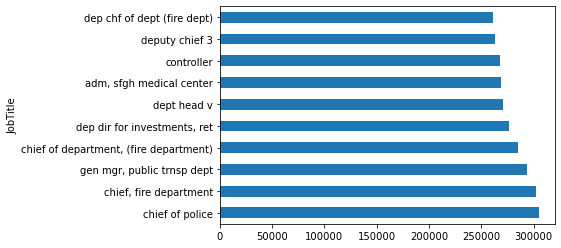

In [22]:
data.groupby('JobTitle')['BasePay'].median().nlargest(10).plot.barh()
plt.show()

**Still have some correction required like dept and department, cheif and chf etc.***

## Find the job titles of the 10 highest median Overtime Pay


Overtime Pay -> Additional financial compensation for any hours worked by nonexempt staff over the amount of forty hours per week.

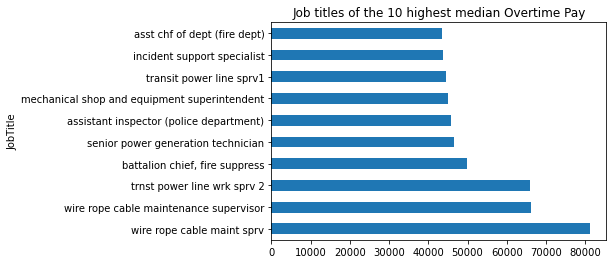

In [23]:
data.groupby('JobTitle')['OvertimePay'].median().nlargest(10).plot.barh(title='Job titles of the 10 highest median Overtime Pay')
plt.show()

## Plot the job titles which have provided the maximum  number of employment

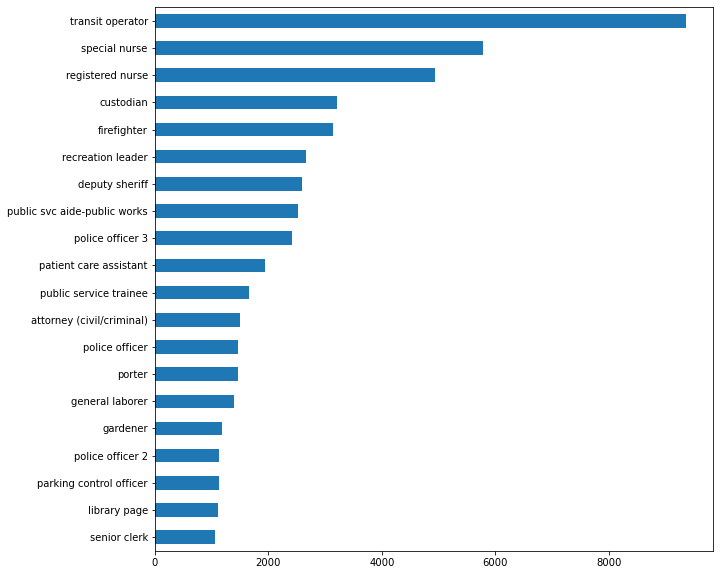

In [24]:
data['JobTitle'].value_counts().nlargest(20).sort_values().plot.barh(figsize=(10, 10))
plt.show()

## Plot the top 10 Job titles with highest mean TotalPayBenefits

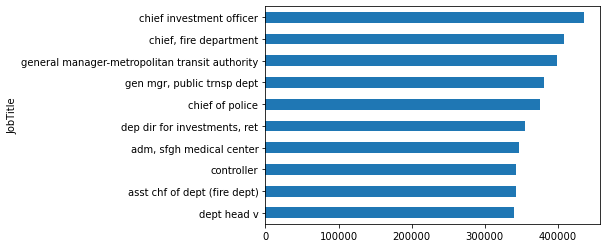

In [25]:
data.groupby('JobTitle')['TotalPayBenefits'].mean().nlargest(10).sort_values().plot.barh()
plt.show()

## Find the highest paid employees for the year 2012, 2013 and 2014



In [26]:
data.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [27]:
data.loc[data.loc[data['Year'].isin([2012, 2013, 2014])].groupby('Year')['TotalPayBenefits'].idxmax(), ['Year','JobTitle', 'EmployeeName']]

,Year,JobTitle,EmployeeName
36159,2012,"lieutenant, fire suppression",Gary Altenberg
72925,2013,chief of police,Gregory P Suhr
110531,2014,deputy chief 3,David Shinn
